# Stock Valuation Using Fundimental and Technical Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1.Web Scraping 

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = "https://finance.yahoo.com/quote/TSE/key-statistics?p=TSE"
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [5]:
title=soup.title
print(title)

<title>TSE Key Statistics | Trinseo S.A. Stock - Yahoo Finance</title>


In [6]:
rows=soup.find_all('tr')
print(rows[:10])

[<tr class="Bxz(bb) H(36px) BdY Bdc($seperatorColor) ks-row Bgc($extraLightBlue):h" data-reactid="14"><td class="Pos(st) Start(0) Bgc($lv2BgColor) ks-row:h_Bgc($extraLightBlue) Pend(10px) Miw(140px)" data-reactid="15"><span data-reactid="16">Market Cap (intraday)</span><!-- react-text: 17 --> <!-- /react-text --><!-- react-text: 18 --><!-- /react-text --><sup aria-label="Shares outstanding is taken from the most recently filed quarterly or annual report and Market Cap is calculated using shares outstanding." data-reactid="19">5</sup><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)" data-reactid="20"></div></td><td class="Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)" data-reactid="21">1.58B</td></tr>, <tr class="Bxz(bb) H(36px) BdB Bdbc($seperatorColor) ks-row Bgc($extraLightBlue):h" data-reactid="22"><td class="Pos(st) Start(0) Bgc($lv2BgColor) ks-row:h_Bgc($extraLightBlue) Pend(10px)" data-reactid="23"><span data-reactid="24">Enterpris

In [7]:
for row in rows:
    row_td= row.find_all('td')
    print (row_td)

[<td class="Pos(st) Start(0) Bgc($lv2BgColor) ks-row:h_Bgc($extraLightBlue) Pend(10px) Miw(140px)" data-reactid="15"><span data-reactid="16">Market Cap (intraday)</span><!-- react-text: 17 --> <!-- /react-text --><!-- react-text: 18 --><!-- /react-text --><sup aria-label="Shares outstanding is taken from the most recently filed quarterly or annual report and Market Cap is calculated using shares outstanding." data-reactid="19">5</sup><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)" data-reactid="20"></div></td>, <td class="Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)" data-reactid="21">1.58B</td>]
[<td class="Pos(st) Start(0) Bgc($lv2BgColor) ks-row:h_Bgc($extraLightBlue) Pend(10px)" data-reactid="23"><span data-reactid="24">Enterprise Value</span><!-- react-text: 25 --> <!-- /react-text --><!-- react-text: 26 --><!-- /react-text --><sup aria-label="Data derived from multiple sources or calculated by Yahoo Finance." data-reactid="27">3

In [8]:
type(row_td)

bs4.element.ResultSet

In [9]:
str_cells=str(row_td)
cleantext= BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[Levered Free Cash Flow (ttm), 235.04M]


In [10]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[Levered Free Cash Flow (ttm), 235.04M]


str

### 2.Data Cleanning

In [11]:
Value = pd.DataFrame(list_rows)
Value.head(10)

,0
0,"[Market Cap (intraday) 5, 1.58B]"
1,"[Enterprise Value 3, 2.46B]"
2,"[Trailing P/E , 12.06]"
3,"[Forward P/E 1, 7.30]"
4,"[PEG Ratio (5 yr expected) 1, -2.54]"
5,"[Price/Sales (ttm), 0.37]"
6,"[Price/Book (mrq), 2.14]"
7,"[Enterprise Value/Revenue 3, 0.58]"
8,"[Enterprise Value/EBITDA 6, 10.40]"
9,"[Beta (3Y Monthly) , 1.99]"


In [12]:
Value = Value[0].str.split(',', expand=True)
Value.head(10)

,0,1,2
0,[Market Cap (intraday) 5,1.58B],None
1,[Enterprise Value 3,2.46B],None
2,[Trailing P/E,12.06],None
3,[Forward P/E 1,7.30],None
4,[PEG Ratio (5 yr expected) 1,-2.54],None
5,[Price/Sales (ttm),0.37],None
6,[Price/Book (mrq),2.14],None
7,[Enterprise Value/Revenue 3,0.58],None
8,[Enterprise Value/EBITDA 6,10.40],None
9,[Beta (3Y Monthly),1.99],None


In [13]:
Value[0] =Value[0].str.strip('[')
Value[1] = Value[1].str.strip(']')
Value.head(10)

,0,1,2
0,Market Cap (intraday) 5,1.58B,None
1,Enterprise Value 3,2.46B,None
2,Trailing P/E,12.06,None
3,Forward P/E 1,7.30,None
4,PEG Ratio (5 yr expected) 1,-2.54,None
5,Price/Sales (ttm),0.37,None
6,Price/Book (mrq),2.14,None
7,Enterprise Value/Revenue 3,0.58,None
8,Enterprise Value/EBITDA 6,10.40,None
9,Beta (3Y Monthly),1.99,None


In [14]:
E_Value= Value.loc[:9]
print(E_Value)

                             0       1     2
0      Market Cap (intraday) 5   1.58B  None
1           Enterprise Value 3   2.46B  None
2                Trailing P/E    12.06  None
3                Forward P/E 1    7.30  None
4  PEG Ratio (5 yr expected) 1   -2.54  None
5            Price/Sales (ttm)    0.37  None
6             Price/Book (mrq)    2.14  None
7   Enterprise Value/Revenue 3    0.58  None
8    Enterprise Value/EBITDA 6   10.40  None
9           Beta (3Y Monthly)     1.99  None


In [15]:
type(E_Value)

pandas.core.frame.DataFrame

In [16]:
E_Value.columns =['Valueation Measures', 'Current Data','Delete']

In [18]:
E_Value=E_Value.dropna(axis=1, how='any')
E_Value

,Valueation Measures,Current Data
0,Market Cap (intraday) 5,1.58B
1,Enterprise Value 3,2.46B
2,Trailing P/E,12.06
3,Forward P/E 1,7.30
4,PEG Ratio (5 yr expected) 1,-2.54
5,Price/Sales (ttm),0.37
6,Price/Book (mrq),2.14
7,Enterprise Value/Revenue 3,0.58
8,Enterprise Value/EBITDA 6,10.40
9,Beta (3Y Monthly),1.99


In [18]:
E_Value.dtypes

Valueation Measures    object
Current Data           object
dtype: object

### 3.Seperate criterias that are related to companies intrinsic value 

In [24]:
E_Value.iloc[0,E_Value.columns.get_loc('Current Data')] = 1.58
E_Value.iloc[1,E_Value.columns.get_loc('Current Data')] = 2.46
E_Value

,Valueation Measures,Current Data
0,Market Cap (intraday) 5,1.58
1,Enterprise Value 3,2.46
2,Trailing P/E,12.06
3,Forward P/E 1,7.30
4,PEG Ratio (5 yr expected) 1,-2.54
5,Price/Sales (ttm),0.37
6,Price/Book (mrq),2.14
7,Enterprise Value/Revenue 3,0.58
8,Enterprise Value/EBITDA 6,10.40
9,Beta (3Y Monthly),1.99


In [25]:
E_Value.dtypes

Valueation Measures    object
Current Data           object
dtype: object

In [27]:
E_Value2=E_Value['Current Data'].astype(float)
type(E_Value2)

pandas.core.series.Series

### 4. Simple decision making

##### Generally the first criteria we need to consider is Enterpise Value/EBITDA which shown in row 8. EV/EBITDA is a indicator of whether the current price is overpriced or not, when EV/EBITDA is over 7 or 8, that means it is overpriced. Usually analyst may continue work on some other criterias, but in this case I want to apply more of python, so I decided to go and try technical approach. 

In [28]:
if E_Value2.loc[8]<=7:
    print('Pass')
else:
        print('Need Technology Approach')

Need Technology Approach


## Technical Approach

In [4]:
# CSV Data from Google Finnance, historical prices of TSE from 2018-10-08 to 2019-10-07
TSE=pd.read_csv('TSE.CSV')
TSE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-08,80.940002,81.419998,79.580002,81.010002,78.436867,445500
1,2018-10-09,80.690002,80.720001,75.870003,76.150002,74.097099,1087100
2,2018-10-10,69.449997,70.000000,59.910000,60.349998,58.723045,2586200
3,2018-10-11,59.990002,60.967999,58.259998,59.509998,57.905689,1290200
4,2018-10-12,60.630001,61.790001,60.505001,61.490002,59.832314,665500


### 1. Data Formating

In [9]:
TSE2=TSE.set_index('Date')
TSE2=pd.DataFrame(TSE2.loc[:,'Close'])
TSE2.head()
TSE2.dtypes

Close    float64
dtype: object

### 2. Calculating Moving Average(short==30days MA, Long==100days MA)

In [12]:
short_rolling=TSE2.rolling(window=30).mean()
short_rolling.columns=['MA 30']
short_rolling.head(30)
type(short_rolling)

pandas.core.frame.DataFrame

In [11]:
long_rolling = TSE2.rolling(window=100).mean()
long_rolling.columns=['MA 100']
long_rolling.tail()

,MA 100
Date,
2019-10-01,38.2995
2019-10-02,38.2623
2019-10-03,38.2545
2019-10-04,38.2441
2019-10-07,38.2260


### 3.Merge MA30, MA100 with the real price and make a plot

In [14]:
rolling=pd.merge(short_rolling, long_rolling, on='Date')
TSE3=pd.merge(rolling, TSE2, on='Date')

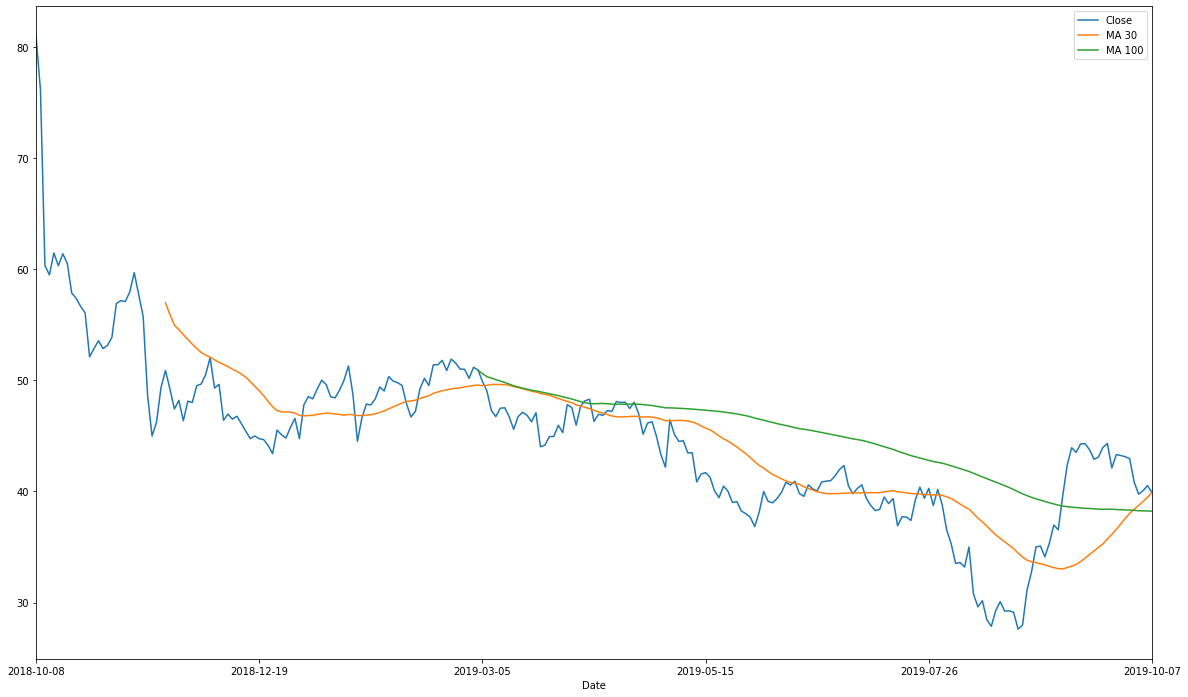

In [15]:
TSE3[['Close','MA 30','MA 100']].plot(subplots=False,figsize=(20,12));


#### MA Conclusion & Concern: Moving average is classic method to determine the timing of investment on certain stocks. In general, when short-term MA crossover with real price from upside to downside that indicates in short-term we should short sell, the price of this stock should go down in few days or weeks. When MA move up across the price line from the downside, it indicates the stock price will go up in next few days or weeks. As we can see in the graph, TSE generally follows this trend, however, MA is a little bit dated for nowadays market, it is not as accurate as it used to be(off course, if it is very accurate, all of us are billionaires now, MA can be easily found on any market web-site).
#### An Introduction of EMA: EMA represents Exponential Moving Average. EMA come up from reguler MA, but it reduced the time lag of traditional method, in another word, more accurate. However, EMA is more math-intensive, it has a series of formulas and parameters that not everyone wants to deal with. While in python, it is just one single command. 

### 4. EMA

In [18]:
ema_short = TSE2.ewm(span=30, adjust=False).mean()
ema_short.head()


,Close
Date,
2018-10-08,81.010002
2018-10-09,80.696454
2018-10-10,79.383779
2018-10-11,78.101600
2018-10-12,77.029884


In [21]:
ema_short.columns=['EMA30']
ema_short.head()

,EMA30
Date,
2018-10-08,81.010002
2018-10-09,80.696454
2018-10-10,79.383779
2018-10-11,78.101600
2018-10-12,77.029884


In [22]:
TSE4=pd.merge(TSE3, ema_short,on= 'Date')

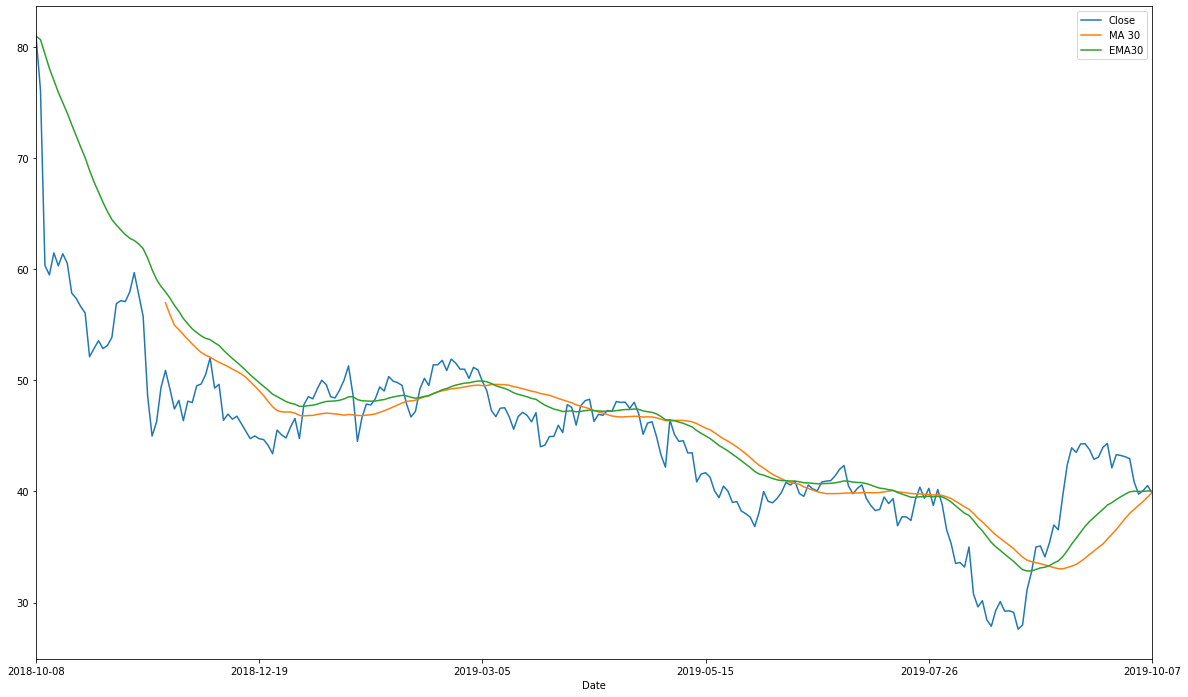

In [23]:
TSE4[['Close','MA 30','EMA30']].plot(subplots=False,figsize=(20,12));

#### Final Conclusion: EMA looks similar to MA, however it gives us a clearer guide for decision making. For example, at around 03-05 and 7-26, EMA showed us a clearer short signal but MA did not (in almost every case, EMA gives us signal one week earlier than MA). As on today(2019-10-07) MA delivers a signal says "buy", but EMA shows that the buy trend has come to the end and we probably should "hold". While EMA indicates a similar decision as I was using fundamental method, where the EV/EBITDA is slightly over 8 but not too much, so probably it is not a very good timing to buy nor short TSE, we might need more research on this stock.    
#### Python is really helpful in plotting EMA, it is extremely easy that I have never expected. Certainly there are more things I can do with python on stock valuation, but as my very first project with Python, I will probably end here. Anyway, as a person comes from basically Zero programming background, I was so impressed by Python, it is not only a tool but also a artwork. I will learn more about Python, I love Pythom.
#### In the end, I want to thanks my Python instructor Ethan. For anybody else who can see this project, I want you to know, he is a extremely friendly person to work with, he beared all my stupid questions with patience. Truely, thank you Ethan!

##### Notes about why I chose TSE as my object: TSE is a stock that I analyzed before during my undergraduate. I decided to buy this stock for school's investment portforlio in April 2019. I used almost all the fundamental analytic methods that I learned, all the indicators told me to buy. TSE has outstanding financial statements, very limited debt. Also as a raising company in petro-chemical industry, the price/quality ratio of their product is very attractive, they also have leading technology in this industry. However, as you can see, I suffered a big loss in this investment. I feel so upset, because TSE is the last stock I picked for my undergraduate school, and it is the only one that I lost. I was wondering why such a raising star had a big drop in stock price. I thought partially that was becasue of US-China trade war, and TSE has their majority of factories in China. I also thought that might because I chose the wrong time to make this investment. So, I learned a little bit of technical approach this summer, and trying to find out if it is the truth.     